# Task 3: Customer Clustering

#### Step 1: Importing Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

#### Step 2: Loading Datasets

In [2]:
customers = pd.read_csv(r"C:\Users\JOGESH\Downloads\Customers.csv")
transactions = pd.read_csv(r"C:\Users\JOGESH\Downloads\Transactions.csv")
data = pd.merge(transactions, customers, on='CustomerID', how='inner')

#### Step 3: Feature Engineering

In [3]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': lambda x: x.nunique()
}).reset_index()
scaler = MinMaxScaler()
customer_features.iloc[:, 1:] = scaler.fit_transform(customer_features.iloc[:, 1:])

#### Step 4: Performing Clustering

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(customer_features.iloc[:, 1:])
    db_scores.append(davies_bouldin_score(customer_features.iloc[:, 1:], kmeans.labels_))
optimal_k = db_scores.index(min(db_scores)) + 2
print(f'Optimal number of clusters: {optimal_k}')
kmeans = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42).fit(customer_features.iloc[:, 1:])
customer_features['Cluster'] = kmeans.labels_

Optimal number of clusters: 2


#### Step 5: Visualizing Clusters

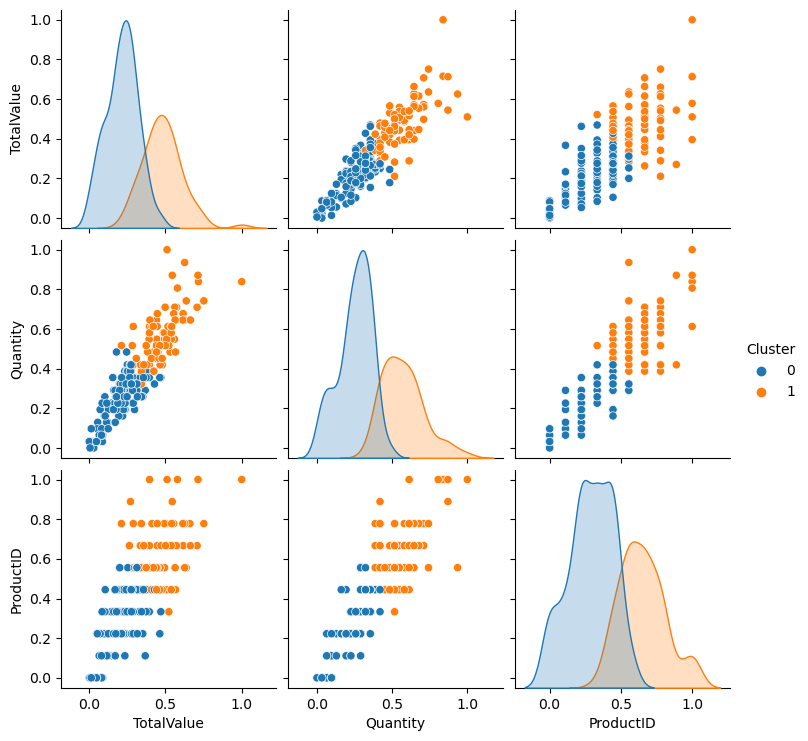

In [6]:
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde')
plt.show()

#### Step 6: Saving Clustering Results

In [7]:
customer_features[['CustomerID', 'Cluster']].to_csv('Keerthana_Kumbham_Clustering.csv', index=False)

#### Step 7: Reporting DB Index

In [8]:
print(f'Davies-Bouldin Index for {optimal_k} clusters: {min(db_scores)}')

Davies-Bouldin Index for 2 clusters: 0.3544759770719979
